In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bitcoin_data.csv', parse_dates=['date'], index_col='date')
print("✅ Data loaded.")

# 2. Initial Check
print("Initial shape:", df.shape)
display(df.head())

✅ Data loaded.
Initial shape: (335, 20)


,price,volume,daily_return,ma_7,ma_30,volatility_7,volatility_30,momentum_7,momentum_30,high,low,hl_pct,pct_change_1d,pct_change_7d,lag_1,lag_2,lag_3,lag_5,lag_7,target
date,,,,,,,,,,,,,,,,,,,,
2024-07-30,66770.320918,4.252904e+10,-2.156914,66869.169922,62646.359948,1.936286,2.459444,-837.392481,5905.877757,66770.320918,66770.320918,0.0,-2.156914,-1.238605,68242.247444,68055.408390,67920.296486,65403.535130,67607.713399,66219.051025
2024-07-31,66219.051025,2.889238e+10,-0.825621,66908.689002,62762.515187,1.695916,2.412542,276.633560,3484.657185,66219.051025,66219.051025,0.0,-0.825621,0.419508,66770.320918,68242.247444,68055.408390,65749.963620,65942.417465,64679.778647
2024-08-01,64679.778647,3.140368e+10,-2.324516,66805.295218,62824.513733,1.909841,2.456510,-723.756483,1859.956378,64679.778647,64679.778647,0.0,-2.324516,-1.106601,66219.051025,66770.320918,68242.247444,67920.296486,65403.535130,65357.529608
2024-08-02,65357.529608,3.891130e+10,1.047856,66749.233217,62935.012552,1.949894,2.448183,-392.434012,3314.964571,65357.529608,65357.529608,0.0,1.047856,-0.596858,64679.778647,66219.051025,66770.320918,68055.408390,65749.963620,61407.295474
2024-08-03,61407.295474,3.900432e+10,-6.044038,65818.804501,62973.766376,2.404065,2.645046,-6513.001012,1162.614710,61407.295474,61407.295474,0.0,-6.044038,-9.589182,65357.529608,64679.778647,66219.051025,68242.247444,67920.296486,60738.744925


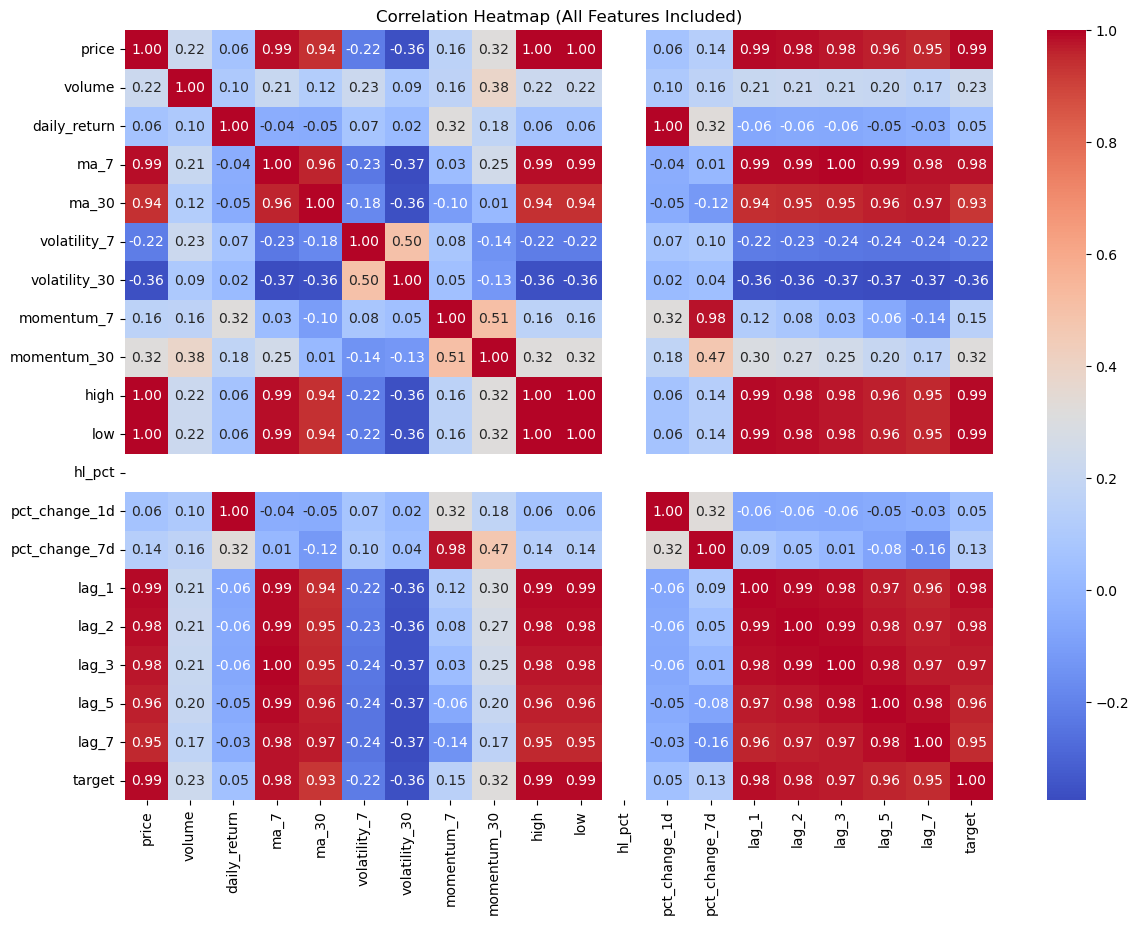

In [3]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (All Features Included)")
plt.show()

In [4]:
all_features = [
    'price', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_5', 'lag_7',
    'ma_7', 'ma_30', 'momentum_30', 'momentum_7', 'volume',
    'volatility_7', 'volatility_30', 'daily_return',
    'pct_change_1d', 'pct_change_7d', 'hl_pct'
]

In [5]:
df_model = df[all_features + ['target']].dropna()
print("Modeling DataFrame shape:", df_model.shape)

Modeling DataFrame shape: (335, 20)


In [7]:
X = df_model[all_features]
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (268, 19), Test shape: (67, 19)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_features, index=X_test.index)

print("Features scaled using StandardScaler.")

Features scaled using StandardScaler.


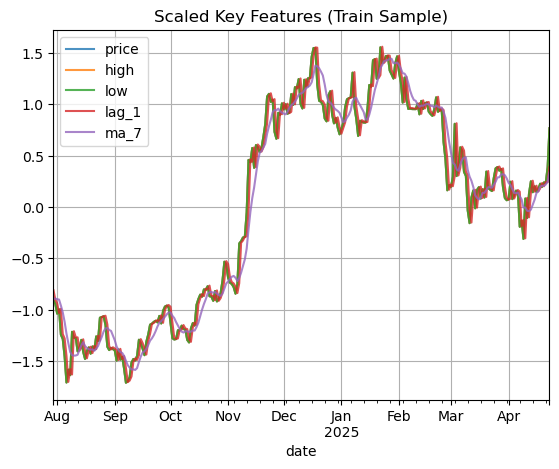

In [10]:
important_features = ['price', 'high', 'low', 'lag_1', 'ma_7']
X_train_scaled_df[important_features].plot(title='Scaled Key Features (Train Sample)', alpha=0.8)
plt.grid()
plt.show()

In [11]:
import joblib
X_train_scaled_df.to_csv('X_train.csv')
X_test_scaled_df.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')
joblib.dump(scaler, 'scaler.pkl')

print("Data and scaler saved. You're now ready for modeling!")

Data and scaler saved. You're now ready for modeling!
